In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Data points
x = np.array([1, 3])
y = np.array([3, 6])
n = len(x)  # Number of points


In [3]:
# Mean Squared Error
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [4]:
def compute_gradients(x, y, y_pred):
    n = len(x)
    dm = (2/n) * np.sum(x * (y_pred - y))
    db = (2/n) * np.sum(y_pred - y)
    return dm, db  # <--- THIS LINE IS ESSENTIAL


In [5]:
# Initial values
m_values = [-1]
b_values = [1]
mse_values = []

# Learning rate
alpha = 0.1

# Perform 4 iterations manually
for i in range(4):
    m = m_values[-1]
    b = b_values[-1]

    # Predict
    y_pred = m * x + b
    mse = compute_mse(y, y_pred)
    mse_values.append(mse)

    # Gradients
    dm, db = compute_gradients(x, y, y_pred)

    # Update
    m_new = m - alpha * dm
    b_new = b - alpha * db

    # Store
    m_values.append(m_new)
    b_values.append(b_new)

    # Output each iteration
    print(f"Iteration {i}:")
    print(f"  m = {m:.3f}, b = {b:.3f}")
    print(f"  MSE = {mse:.4f}")
    print(f"  Gradient (dm, db) = ({dm:.4f}, {db:.4f})")
    print("-" * 30)


Iteration 0:
  m = -1.000, b = 1.000
  MSE = 36.5000
  Gradient (dm, db) = (-27.0000, -11.0000)
------------------------------
Iteration 1:
  m = 1.700, b = 2.100
  MSE = 1.0400
  Gradient (dm, db) = (4.4000, 2.0000)
------------------------------
Iteration 2:
  m = 1.260, b = 1.900
  MSE = 0.0640
  Gradient (dm, db) = (-0.8000, -0.1600)
------------------------------
Iteration 3:
  m = 1.340, b = 1.916
  MSE = 0.0348
  Gradient (dm, db) = (0.0640, 0.1920)
------------------------------


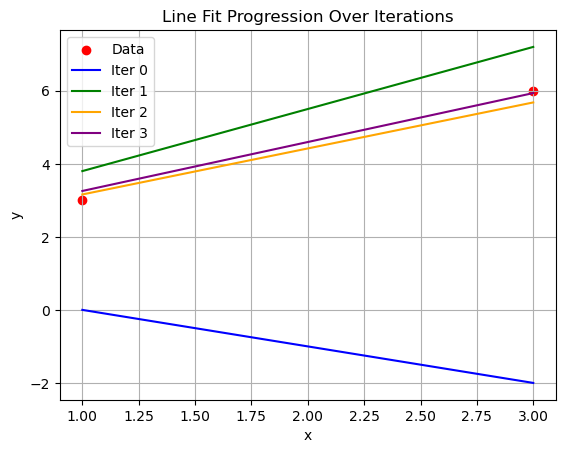

In [6]:
# Plot data points
plt.scatter(x, y, color='red', label='Data')

# Plot lines from each iteration
colors = ['blue', 'green', 'orange', 'purple']
for i in range(len(m_values) - 1):
    y_line = m_values[i] * x + b_values[i]
    plt.plot(x, y_line, label=f'Iter {i}', color=colors[i])

plt.legend()
plt.title("Line Fit Progression Over Iterations")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

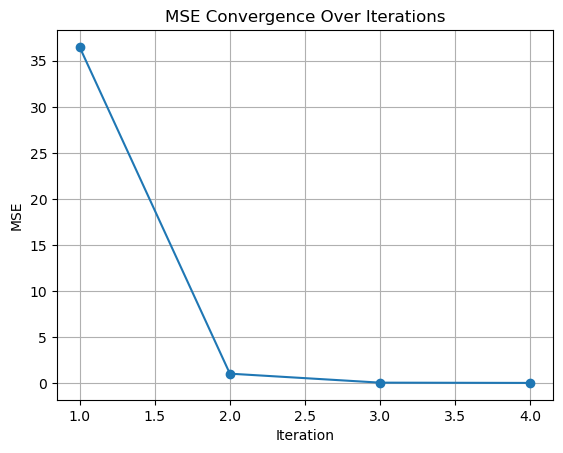

In [7]:
# Plot MSE over iterations
plt.plot(range(1, len(mse_values)+1), mse_values, marker='o')
plt.title("MSE Convergence Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()